# **Movie Rating Prediction**




In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras import models
from keras import layers
from keras.layers import Dense,Dropout
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing
import tensorflow as tf

# 1. Data Inspection

In [28]:
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin1')

In [29]:
df.shape

(15509, 10)

In [30]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [31]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [33]:
print("Total records (rows) in the dataset : {}".format(df.shape[0]))
print("Total columns (features) in the dataset : {}".format(df.shape[1]))

Total records (rows) in the dataset : 15509
Total columns (features) in the dataset : 10


Numeric Columns and Non-Numeric Columns

In [34]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are : {}".format(numeric_cols))


# select non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are : {}".format(non_numeric_cols))

The numeric columns are : ['Rating']
The non-numeric columns are : ['Name' 'Year' 'Duration' 'Genre' 'Votes' 'Director' 'Actor 1' 'Actor 2'
 'Actor 3']


In [35]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


# 2. Handling Missing Data

In [36]:
missing=df.isna()

In [37]:
missing.sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [38]:
# Calculate the Percentage of Missing Values:
missing_percentage = (missing.sum() / len(df)) * 100

 Identify Rows or Columns with High Missing Values:

In [39]:
# Define a threshold
threshold = 20

# Identify columns with a high percentage of missing values
high_missing_columns = missing_percentage[missing_percentage > threshold].index.tolist()

In [40]:
df=df.dropna()

In [41]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


#Impute Missing Values

In [42]:
from sklearn.impute import SimpleImputer

# Create an imputer for numerical data (e.g., mean imputation)
numerical_imputer = SimpleImputer(strategy='mean')
df['Rating'] = numerical_imputer.fit_transform(df[['Rating']])

<ipython-input-42-398311a49f57>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'] = numerical_imputer.fit_transform(df[['Rating']])


In [43]:
# Create an imputer for categorical data (e.g., mode imputation)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df['Genre'] = categorical_imputer.fit_transform(df[['Genre']])

<ipython-input-43-481e4443a054>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre'] = categorical_imputer.fit_transform(df[['Genre']])


In [44]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [45]:
missing=df.isna()

In [46]:
missing.sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [47]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

**Data Visualization**

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

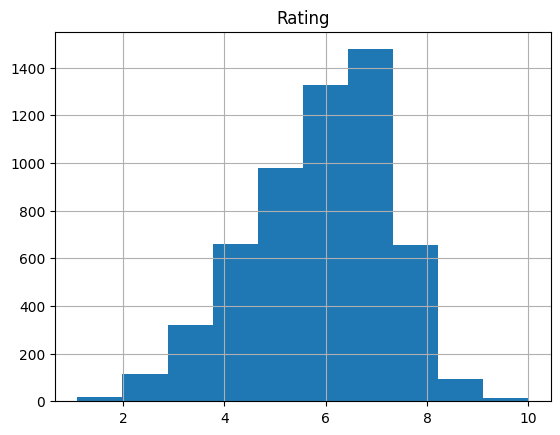

In [48]:
df.hist(column=['Rating'])

In [49]:
df['Genre'].unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Horror, Mystery, Romance',
       'Horror, Mystery', 'Drama, Horror, Romance',
       'Action, Drama, History', 'Action, Drama, War', 'Thriller',
       'Comedy', 'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Drama, History', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Adventure, Drama', 'Comedy, Mystery, Thriller', 'Drama, Romance',
       'Crime, Thriller', 'Horror, Sci-Fi, Thriller',
       'Drama, Mystery, Thriller', 'Drama, Family, Musical',
       'Action, Comedy', 'Action, Adventure, Fantasy', 'Documentary',
       'Drama, Horro

In [50]:
df['Rating'].max()

10.0

In [51]:
df.loc[df['Rating']==df['Rating'].max()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


In [52]:
df.loc[(df['Rating'].min()==df['Rating']) ]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12171,Sadak 2,(2020),133 min,"Action, Drama",1.1,"67,785",Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt


In [53]:
df.loc[df['Votes']==df['Votes'].max()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12569,Satyam Shivam Sundaram: Love Sublime,(1978),172 min,"Drama, Romance",7.1,999,Raj Kapoor,Shashi Kapoor,Zeenat Aman,Kanhaiyalal Chaturvedi


In [54]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [55]:
df['Votes']=df['Votes'].str.replace(",","")

In [56]:
df['Votes']=df['Votes'].astype(int)
df['Votes'].dtypes

dtype('int64')

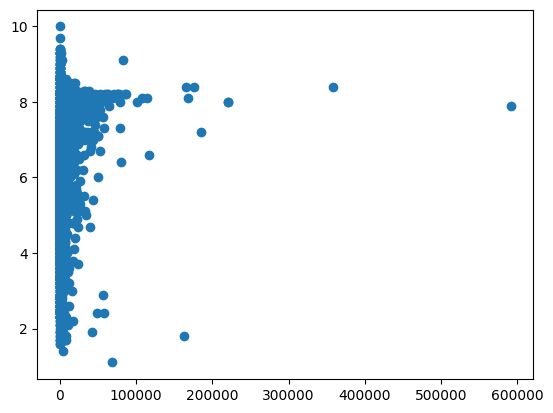

In [61]:
plt.scatter(df["Votes"],df["Rating"])
plt.show()

<ipython-input-62-842e023cb4df>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df.Votes, hist=False)


<Axes: xlabel='Votes', ylabel='Density'>

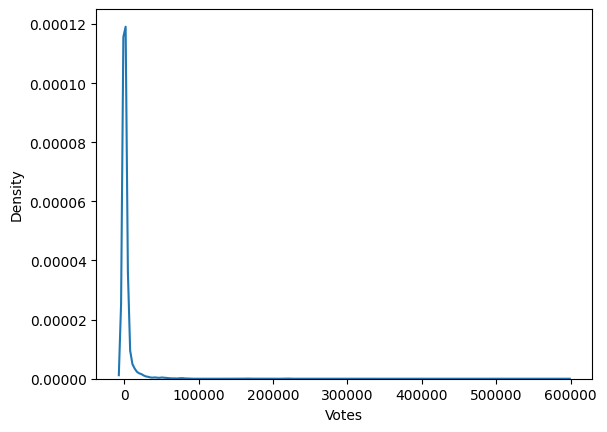

In [62]:
sns.distplot(a=df.Votes, hist=False)

In [63]:
df.dropna(subset=['Genre'], inplace=True)

In [64]:
df=df.reset_index()

In [65]:
df.head()

,index,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [66]:
list_Genre=[]
list_Genre=df['Genre'].str.split(",")
list_Genre

0                             [Drama]
1                  [Comedy,  Romance]
2          [Comedy,  Drama,  Musical]
3             [Drama,  Romance,  War]
4       [Horror,  Mystery,  Thriller]
                    ...              
5654                          [Drama]
5655    [Biography,  Drama,  History]
5656         [Action,  Crime,  Drama]
5657                 [Action,  Drama]
5658                 [Action,  Drama]
Name: Genre, Length: 5659, dtype: object

In [67]:
Genre=[]
for x in list_Genre:
  Genre.extend(x)

In [68]:
Genre

['Drama',
 'Comedy',
 ' Romance',
 'Comedy',
 ' Drama',
 ' Musical',
 'Drama',
 ' Romance',
 ' War',
 'Horror',
 ' Mystery',
 ' Thriller',
 'Action',
 ' Crime',
 ' Thriller',
 'Drama',
 'Horror',
 'Horror',
 ' Romance',
 ' Thriller',
 'Comedy',
 ' Drama',
 ' Romance',
 'Comedy',
 ' Drama',
 'Comedy',
 ' Drama',
 ' Romance',
 'Crime',
 ' Drama',
 ' Mystery',
 'Horror',
 ' Thriller',
 'Comedy',
 ' Horror',
 'Drama',
 ' Horror',
 ' Mystery',
 'Drama',
 'Drama',
 'Action',
 ' Thriller',
 'Action',
 'Drama',
 'Horror',
 ' Mystery',
 ' Romance',
 'Horror',
 ' Mystery',
 'Drama',
 ' Horror',
 ' Romance',
 'Horror',
 ' Mystery',
 ' Romance',
 'Action',
 ' Drama',
 ' History',
 'Action',
 ' Drama',
 ' War',
 'Thriller',
 'Comedy',
 'Adventure',
 ' Horror',
 ' Mystery',
 'Action',
 ' Crime',
 ' Thriller',
 'Comedy',
 ' Drama',
 ' Romance',
 'Action',
 ' Sci-Fi',
 'Crime',
 ' Mystery',
 ' Thriller',
 'Comedy',
 'Thriller',
 'Drama',
 ' History',
 'Sport',
 'Biography',
 ' Drama',
 ' History',
 'D

In [69]:
Genres=[i.strip() for i in Genre]

In [70]:
df2=pd.DataFrame(Genres)
df2

,0
0,Drama
1,Comedy
2,Romance
3,Comedy
4,Drama
...,...
11974,Drama
11975,Action
11976,Drama
11977,Action


In [71]:
df2.columns=["Genre"]
count_of_genre=df2["Genre"].value_counts()
count_of_genre

Drama          3796
Action         1686
Romance        1380
Comedy         1344
Crime           875
Thriller        679
Family          416
Musical         412
Mystery         304
Adventure       277
Horror          202
Fantasy         146
Biography       115
History          99
Music            53
Documentary      48
Sport            40
Animation        40
War              33
Sci-Fi           32
News              1
Western           1
Name: Genre, dtype: int64

In [73]:
listOfGenre=df2["Genre"].unique()
len(listOfGenre)

22

In [74]:
listOfGenre

array(['Drama', 'Comedy', 'Romance', 'Musical', 'War', 'Horror',
       'Mystery', 'Thriller', 'Action', 'Crime', 'History', 'Adventure',
       'Sci-Fi', 'Sport', 'Biography', 'Family', 'Fantasy', 'Documentary',
       'Music', 'Animation', 'News', 'Western'], dtype=object)

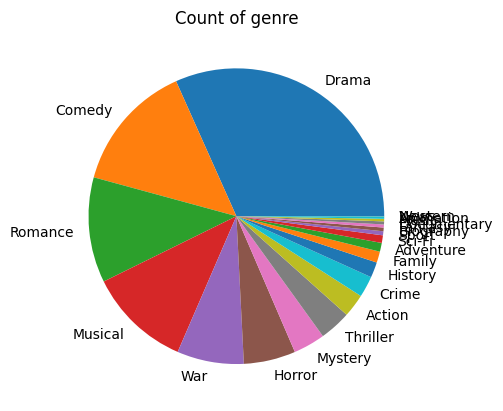

In [75]:
labels=['Drama', 'Comedy', 'Romance', 'Musical', 'War', 'Horror','Mystery', 'Thriller', 'Action', 'Crime', 'History', 'Family','Adventure', 'Sci-Fi', 'Sport', 'Biography', 'Fantasy','Documentary', 'Music', 'Animation', 'News', 'Western']
plt.pie(count_of_genre, labels = labels)
plt.title('Count of genre')
plt.show()

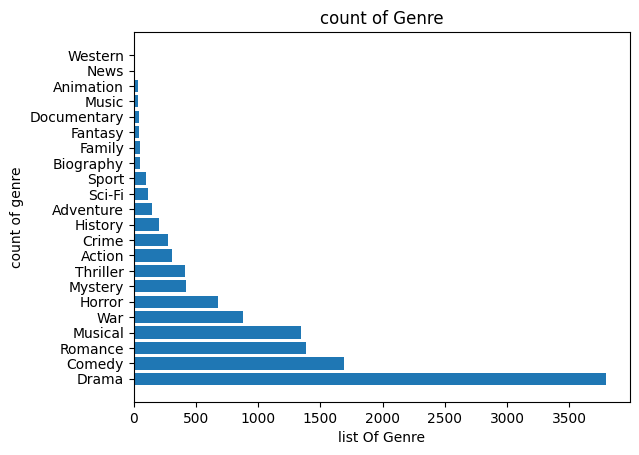

<Figure size 15500x10000 with 0 Axes>

In [76]:
plt.barh(listOfGenre,count_of_genre)
plt.title('count of Genre')
plt.xlabel('list Of Genre')
plt.ylabel('count of genre')
plt.figure(figsize=(155,100))
plt.show()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     5659 non-null   int64  
 1   Name      5659 non-null   object 
 2   Year      5659 non-null   object 
 3   Duration  5659 non-null   object 
 4   Genre     5659 non-null   object 
 5   Rating    5659 non-null   float64
 6   Votes     5659 non-null   int64  
 7   Director  5659 non-null   object 
 8   Actor 1   5659 non-null   object 
 9   Actor 2   5659 non-null   object 
 10  Actor 3   5659 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 486.4+ KB


In [78]:
listOfRate=[]
listOfRate=df['Rating'].values.tolist()
listOfRate

[7.0,
 4.4,
 4.7,
 7.4,
 5.6,
 4.0,
 6.2,
 5.9,
 6.5,
 5.7,
 7.4,
 6.3,
 7.2,
 4.4,
 6.6,
 7.3,
 7.1,
 5.6,
 6.9,
 3.5,
 4.5,
 6.4,
 4.1,
 4.8,
 4.5,
 7.2,
 8.1,
 4.0,
 5.5,
 6.8,
 5.0,
 6.9,
 6.2,
 3.5,
 6.1,
 6.1,
 7.7,
 6.1,
 5.1,
 6.9,
 5.0,
 3.3,
 7.8,
 6.9,
 8.4,
 6.9,
 4.3,
 5.8,
 5.7,
 7.5,
 5.7,
 5.6,
 5.6,
 3.6,
 6.3,
 7.3,
 4.8,
 7.8,
 5.7,
 6.5,
 4.6,
 4.2,
 6.2,
 5.3,
 5.0,
 5.7,
 6.2,
 6.1,
 4.1,
 5.3,
 5.3,
 5.4,
 6.6,
 4.7,
 5.3,
 7.3,
 7.4,
 4.8,
 8.1,
 6.3,
 7.5,
 6.8,
 4.5,
 3.0,
 6.3,
 6.2,
 8.0,
 7.3,
 6.0,
 3.1,
 3.8,
 7.9,
 8.1,
 5.5,
 8.0,
 5.0,
 7.2,
 4.4,
 2.7,
 6.8,
 2.4,
 5.5,
 7.4,
 5.5,
 5.1,
 7.6,
 6.4,
 5.4,
 6.7,
 6.8,
 6.5,
 6.7,
 6.2,
 5.0,
 7.6,
 5.4,
 4.2,
 5.3,
 7.4,
 4.6,
 4.1,
 5.3,
 4.8,
 4.8,
 3.4,
 5.0,
 3.1,
 5.0,
 4.2,
 7.2,
 6.0,
 6.0,
 6.8,
 5.5,
 5.6,
 3.1,
 4.7,
 5.1,
 5.3,
 3.5,
 4.3,
 3.1,
 5.8,
 5.0,
 3.3,
 5.6,
 4.4,
 6.2,
 6.7,
 7.1,
 5.2,
 4.1,
 5.0,
 4.9,
 6.3,
 6.9,
 7.3,
 2.8,
 6.3,
 7.9,
 7.0,
 5.4,
 7.2,
 3.0,
 7.7,
 4.8,
 7.7

In [79]:
rates=[]
for i in range(len(list_Genre)):
    for j in range(len(list_Genre[i])):
           rates.append(listOfRate[i])

In [80]:
rates

[7.0,
 4.4,
 4.4,
 4.7,
 4.7,
 4.7,
 7.4,
 7.4,
 7.4,
 5.6,
 5.6,
 5.6,
 4.0,
 4.0,
 4.0,
 6.2,
 5.9,
 6.5,
 6.5,
 6.5,
 5.7,
 5.7,
 5.7,
 7.4,
 7.4,
 6.3,
 6.3,
 6.3,
 7.2,
 7.2,
 7.2,
 4.4,
 4.4,
 6.6,
 6.6,
 7.3,
 7.3,
 7.3,
 7.1,
 5.6,
 6.9,
 6.9,
 3.5,
 4.5,
 6.4,
 6.4,
 6.4,
 4.1,
 4.1,
 4.8,
 4.8,
 4.8,
 4.5,
 4.5,
 4.5,
 7.2,
 7.2,
 7.2,
 8.1,
 8.1,
 8.1,
 4.0,
 5.5,
 6.8,
 6.8,
 6.8,
 5.0,
 5.0,
 5.0,
 6.9,
 6.9,
 6.9,
 6.2,
 6.2,
 3.5,
 3.5,
 3.5,
 6.1,
 6.1,
 7.7,
 7.7,
 6.1,
 5.1,
 5.1,
 5.1,
 6.9,
 5.0,
 5.0,
 3.3,
 3.3,
 7.8,
 7.8,
 6.9,
 8.4,
 8.4,
 6.9,
 4.3,
 4.3,
 5.8,
 5.8,
 5.8,
 5.7,
 5.7,
 5.7,
 7.5,
 7.5,
 5.7,
 5.7,
 5.6,
 5.6,
 3.6,
 3.6,
 3.6,
 6.3,
 7.3,
 7.3,
 7.3,
 4.8,
 7.8,
 7.8,
 7.8,
 5.7,
 6.5,
 6.5,
 4.6,
 4.6,
 4.6,
 4.2,
 6.2,
 5.3,
 5.3,
 5.0,
 5.7,
 5.7,
 6.2,
 6.1,
 6.1,
 6.1,
 4.1,
 4.1,
 4.1,
 5.3,
 5.3,
 5.3,
 5.3,
 5.4,
 5.4,
 5.4,
 6.6,
 6.6,
 6.6,
 4.7,
 4.7,
 5.3,
 7.3,
 7.3,
 7.3,
 7.4,
 7.4,
 4.8,
 4.8,
 8.1,
 6.3,
 7.5,
 7.5,
 6.8,
 6.8

In [81]:
df_rating=pd.DataFrame(rates)

In [82]:
df_rating.columns=['ratings']

In [83]:
df2=df2.merge(df_rating,left_index=True, right_index=True)

In [84]:
df2.head()

,Genre,ratings
0,Drama,7.0
1,Comedy,4.4
2,Romance,4.4
3,Comedy,4.7
4,Drama,4.7


In [85]:
df2.value_counts()

Genre    ratings
Drama    6.8        141
         6.2        140
         6.5        132
         7.2        132
         7.1        117
                   ... 
Fantasy  8.3          1
         8.1          1
         8.0          1
         7.8          1
Western  5.7          1
Length: 1019, dtype: int64

In [86]:
avg_ratings=df2.groupby('Genre')['ratings'].mean()
avg_ratings

Genre
Action         5.520463
Adventure      5.879422
Animation      6.072500
Biography      6.737391
Comedy         5.751042
Crime          5.820114
Documentary    7.608333
Drama          6.056744
Family         6.323317
Fantasy        5.808219
History        6.905051
Horror         4.817327
Music          6.071698
Musical        6.246845
Mystery        5.867763
News           8.000000
Romance        5.811087
Sci-Fi         5.253125
Sport          6.515000
Thriller       5.630044
War            5.981818
Western        5.700000
Name: ratings, dtype: float64

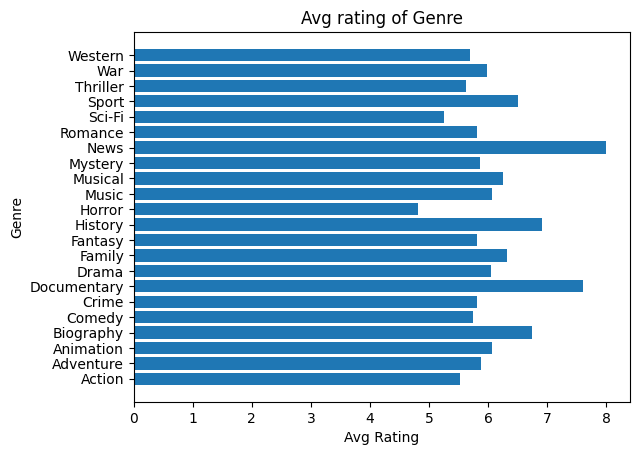

In [87]:
plt.barh(avg_ratings.index,avg_ratings.values)
plt.xlabel("Avg Rating")
plt.ylabel("Genre")
plt.title("Avg rating of Genre")
plt.show()

In [88]:
df['Year'].unique()

array(['(2019)', '(1997)', '(2005)', '(2012)', '(2014)', '(2004)',
       '(2016)', '(1991)', '(2018)', '(2010)', '(1958)', '(2021)',
       '(2017)', '(2009)', '(1993)', '(2002)', '(2008)', '(1994)',
       '(2007)', '(2003)', '(1998)', '(1979)', '(1974)', '(2015)',
       '(2006)', '(1981)', '(2020)', '(1985)', '(2013)', '(2011)',
       '(1988)', '(1987)', '(1999)', '(1973)', '(1968)', '(1982)',
       '(1977)', '(1950)', '(1969)', '(1948)', '(1990)', '(1989)',
       '(2001)', '(2000)', '(1953)', '(1978)', '(1963)', '(1992)',
       '(1976)', '(1984)', '(1986)', '(1966)', '(1975)', '(1980)',
       '(1967)', '(1970)', '(1952)', '(1972)', '(1971)', '(1964)',
       '(1954)', '(1962)', '(1957)', '(1965)', '(1996)', '(1995)',
       '(1956)', '(1955)', '(1936)', '(1983)', '(1951)', '(1961)',
       '(1959)', '(1949)', '(1960)', '(1946)', '(1940)', '(1945)',
       '(1938)', '(1941)', '(1942)', '(1935)', '(1937)', '(1947)',
       '(1931)', '(1933)', '(1943)', '(1944)', '(1932)', '(193

In [89]:
year=df['Year'].value_counts()
year

(2019)    227
(2017)    211
(2018)    202
(2015)    177
(2016)    173
         ... 
(1931)      2
(1939)      2
(1934)      2
(1933)      1
(1932)      1
Name: Year, Length: 91, dtype: int64

In [90]:
df['Year']=df['Year'].str.replace("(","")
df['Year']=df['Year'].str.replace(")","")

<ipython-input-90-4b3772518195>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Year']=df['Year'].str.replace("(","")
<ipython-input-90-4b3772518195>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Year']=df['Year'].str.replace(")","")


In [91]:
df['Year']=df['Year'].astype(int)

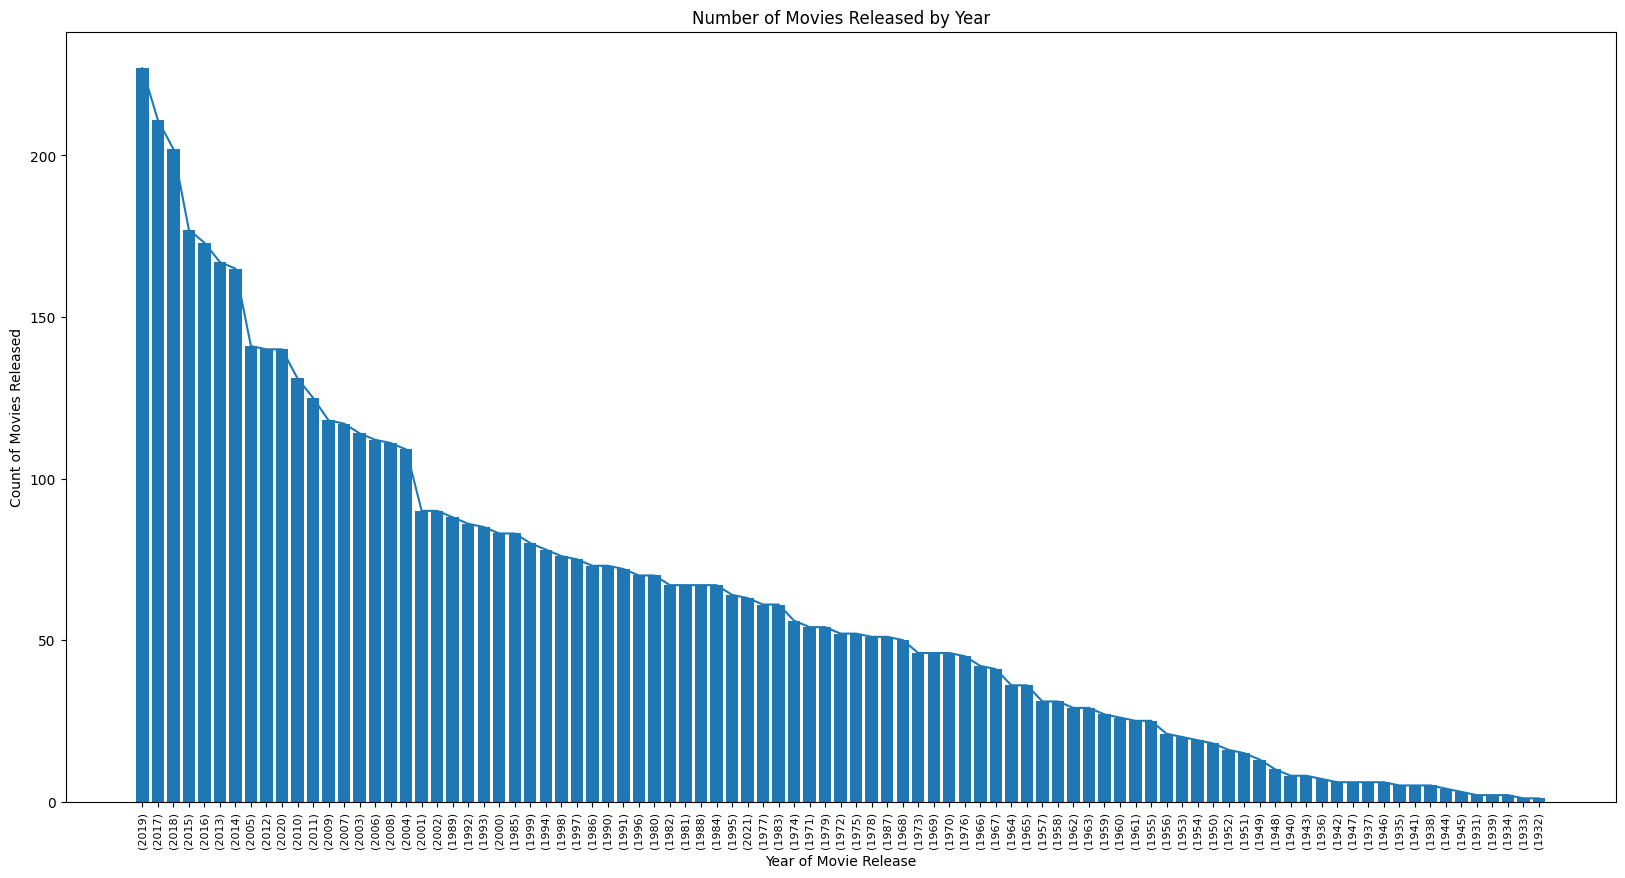

In [92]:
plt.bar(year.index,year.values)
plt.xlabel("Year of Movie Release")
plt.ylabel("Count of Movies Released")
plt.title("Number of Movies Released by Year")
year.plot(figsize=(20,10))
plt.xticks(rotation='vertical', fontsize=8)
plt.show()

In [93]:
df.dropna(subset=['Actor 1','Actor 2','Actor 3','Duration'], inplace=True)

In [94]:
len(df['Actor 1'])

5659

In [95]:
len(df['Actor 1'].unique())

1960

In [96]:
len(df['Actor 2'].unique())

2321

In [97]:
len(df['Actor 3'].unique())

2556

In [98]:
df[(df['Actor 1']==df['Actor 2']) | (df['Actor 3']==df['Actor 2']) | (df['Actor 3']==df['Actor 1'])]

,index,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
29,50,2 Nights in Soul Valley,2012,80 min,"Adventure, Horror, Mystery",6.8,21,Harish Sharma,Hemant Pandey,Sumeet Sharma,Sumeet Sharma
214,488,Aashmani Jawaharat,2014,132 min,Drama,6.1,10,Sriparna Dey,Anamitra Roy,Anamitra Roy,Yovik
389,920,Amavas,2019,134 min,"Horror, Thriller",2.8,308,Bhushan Patel,Ali Asgar,Ali Asgar,Vivan Bhatena
479,1162,Antenna,2021,84 min,Drama,7.1,7,Shoib Nikash Shah,Imran Khan,Imran Khan,Azmat Khwaja
1347,3589,Delhi 47 KM,2018,98 min,Drama,5.9,24,Shadab Khan,Shadab Khan,Shadab Khan,Shadab Khan
1442,3841,Dil Diya Dard Liya,1966,169 min,"Drama, Musical, Romance",6.4,119,Abdul Rashid Kardar,Dilip Kumar,Dilip Kumar,Waheeda Rehman
1623,4324,Eight Days,1946,141 min,"Comedy, Drama",6.5,8,D.N. Pai,Ashok Kumar,Ashok Kumar,Veera
1707,4572,Evadithe Nakenti,2007,170 min,"Action, Crime, Drama",6.2,58,Jeevitha,Rajasekhar,Samudra V.,Rajasekhar
1947,5200,GRADE,2017,64 min,Drama,6.1,27,Anup Samaddar,Mrinalini Chatterjee,Swati Ghosh,Mrinalini Chatterjee
2149,5716,Hind Ka Napak Ko Jawab,2017,130 min,"Action, Thriller",6.6,3993,Honeypreet Insan,Gurmeet Ram Rahim Singh,Gurmeet Ram Rahim Singh,Honeypreet Insan


In [99]:
actors=df.groupby('Actor 1')['Rating'].mean()
actors

Actor 1
A. Muthu              3.300000
A. Nairang            6.100000
A.K. Hangal           6.200000
A.S. Ravindra Babu    4.800000
Aachi Manorama        4.800000
                        ...   
Zarina Wahab          2.600000
Zayed Khan            4.575000
Zeenat Aman           6.045455
Zenia Starr           7.400000
Zulfi Sayed           5.200000
Name: Rating, Length: 1960, dtype: float64

In [100]:
df.groupby('Actor 1')['Rating'].median()

Actor 1
A. Muthu              3.3
A. Nairang            6.1
A.K. Hangal           6.2
A.S. Ravindra Babu    4.8
Aachi Manorama        4.8
                     ... 
Zarina Wahab          2.6
Zayed Khan            4.4
Zeenat Aman           6.5
Zenia Starr           7.4
Zulfi Sayed           5.2
Name: Rating, Length: 1960, dtype: float64

In [101]:
top_20_rates_movies_of_actor=df[(df['Rating']>=7)]['Actor 1'].head(20)
top_20_rates_movies_of_actor

0            Rasika Dugal
3         Jimmy Sheirgill
10       Amitabh Bachchan
12              Guru Dutt
15               Madhavan
16           Shabana Azmi
25            Anil Kapoor
26         Manoj Bajpayee
36    Nachiket Patwardhan
42       Naseeruddin Shah
44             Aamir Khan
49        Jennifer Kendal
55         Rajvvir Aroraa
57         Srishti Gautam
75           Raj Nidimoru
76              Ehan Bhat
78      Dhruva Padmakumar
80         Kalki Koechlin
86          Sanjay Deyali
87          Geeta Agrawal
Name: Actor 1, dtype: object

In [102]:
top_20_actor=df.groupby(top_20_rates_movies_of_actor)['Rating'].mean()
top_20_actor

Actor 1
Aamir Khan             8.4
Amitabh Bachchan       7.4
Anil Kapoor            7.2
Dhruva Padmakumar      8.1
Ehan Bhat              7.4
Geeta Agrawal          7.3
Guru Dutt              7.2
Jennifer Kendal        7.5
Jimmy Sheirgill        7.4
Kalki Koechlin         7.5
Madhavan               7.3
Manoj Bajpayee         8.1
Nachiket Patwardhan    7.7
Naseeruddin Shah       7.8
Raj Nidimoru           7.3
Rajvvir Aroraa         7.3
Rasika Dugal           7.0
Sanjay Deyali          8.0
Shabana Azmi           7.1
Srishti Gautam         7.8
Name: Rating, dtype: float64

In [103]:
top_20_actor.value_counts()

7.3    4
7.4    3
7.2    2
8.1    2
7.5    2
7.8    2
8.4    1
7.7    1
7.0    1
8.0    1
7.1    1
Name: Rating, dtype: int64

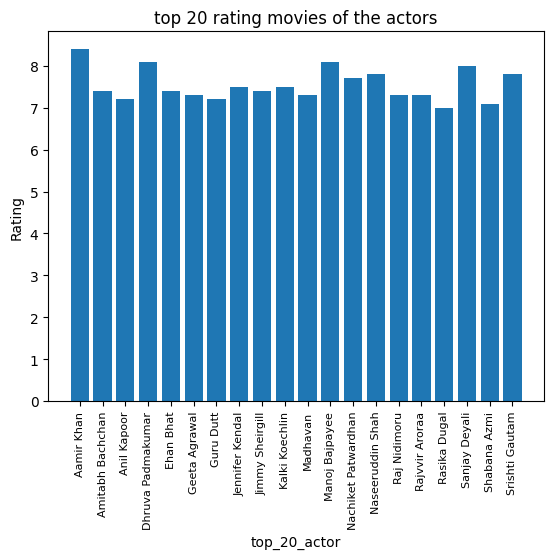

In [104]:
plt.bar(top_20_actor.index,top_20_actor.values)
plt.xlabel("top_20_actor")
plt.ylabel("Rating")
plt.title("top 20 rating movies of the actors")
plt.xticks(rotation='vertical', fontsize=8)
plt.show()

In [105]:
df.loc[(df['Actor 1'].isin(top_20_actor.index))]['Name'].head(20)

0     #Gadhvi (He thought he was Gandhi)
3                              ...Yahaan
10                           102 Not Out
12                            12 O'Clock
15           13B: Fear Has a New Address
16                        15 Park Avenue
25                    1942: A Love Story
26                                  1971
36                          22 June 1897
42                           3 Deewarein
44                              3 Idiots
49                   36 Chowringhee Lane
55                  404: Error Not Found
57                 498A-The Wedding Gift
75                                    99
76                              99 Songs
78                A Billion Colour Story
80                   A Death in the Gunj
82                                A Flat
85                           A Gentleman
Name: Name, dtype: object

In [106]:
df['Director'].value_counts()

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
                        ..
Sriram Raja              1
Randeep Jha              1
Vicky Bhardwaj           1
Salar Shaikh             1
Mozez Singh              1
Name: Director, Length: 2431, dtype: int64

In [107]:
top_20_rates_movies_of_director=df[(df['Rating']>=7)]['Director'].head(20)
top_20_rates_movies_of_director

0                  Gaurav Bakshi
3                 Shoojit Sircar
10                  Umesh Shukla
12            Pramod Chakravorty
15               Vikram K. Kumar
16                    Aparna Sen
25            Vidhu Vinod Chopra
26                   Amrit Sagar
36              Jayoo Patwardhan
42               Nagesh Kukunoor
44               Rajkumar Hirani
49                    Aparna Sen
55                 Prawaal Raman
57                 Suhaib Ilyasi
75                  Krishna D.K.
76       Vishwesh Krishnamoorthy
78    Padmakumar Narasimhamurthy
80            Konkona Sen Sharma
86                 Dhruv Sachdev
87                 Praveen Damle
Name: Director, dtype: object

In [108]:
df.groupby(top_20_rates_movies_of_director)['Rating'].mean()

Director
Amrit Sagar                   8.1
Aparna Sen                    7.3
Dhruv Sachdev                 8.0
Gaurav Bakshi                 7.0
Jayoo Patwardhan              7.7
Konkona Sen Sharma            7.5
Krishna D.K.                  7.3
Nagesh Kukunoor               7.8
Padmakumar Narasimhamurthy    8.1
Pramod Chakravorty            7.2
Praveen Damle                 7.3
Prawaal Raman                 7.3
Rajkumar Hirani               8.4
Shoojit Sircar                7.4
Suhaib Ilyasi                 7.8
Umesh Shukla                  7.4
Vidhu Vinod Chopra            7.2
Vikram K. Kumar               7.3
Vishwesh Krishnamoorthy       7.4
Name: Rating, dtype: float64

In [109]:
df.loc[df['Rating'].max()==df['Rating']]['Name']

3146    Love Qubool Hai
Name: Name, dtype: object

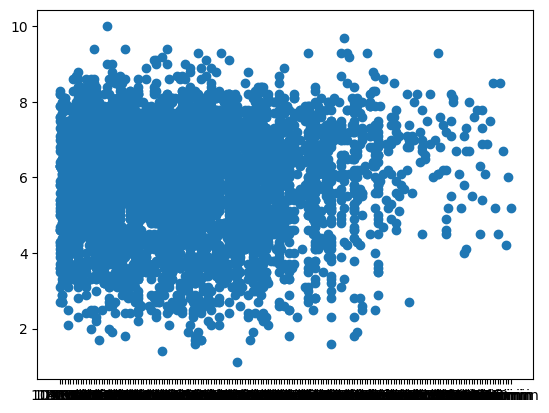

In [110]:
plt.scatter(df['Duration'],df['Rating'])
plt.show()

In [111]:
df['Duration']=df['Duration'].str.replace('min','')

In [112]:
df['Duration']=df['Duration'].astype(int)

In [113]:
df['Duration']


0       109
1       110
2       147
3       142
4        82
       ... 
5654    115
5655    153
5656    125
5657    129
5658    130
Name: Duration, Length: 5659, dtype: int64

In [114]:
df['Duration'].dtype

dtype('int64')

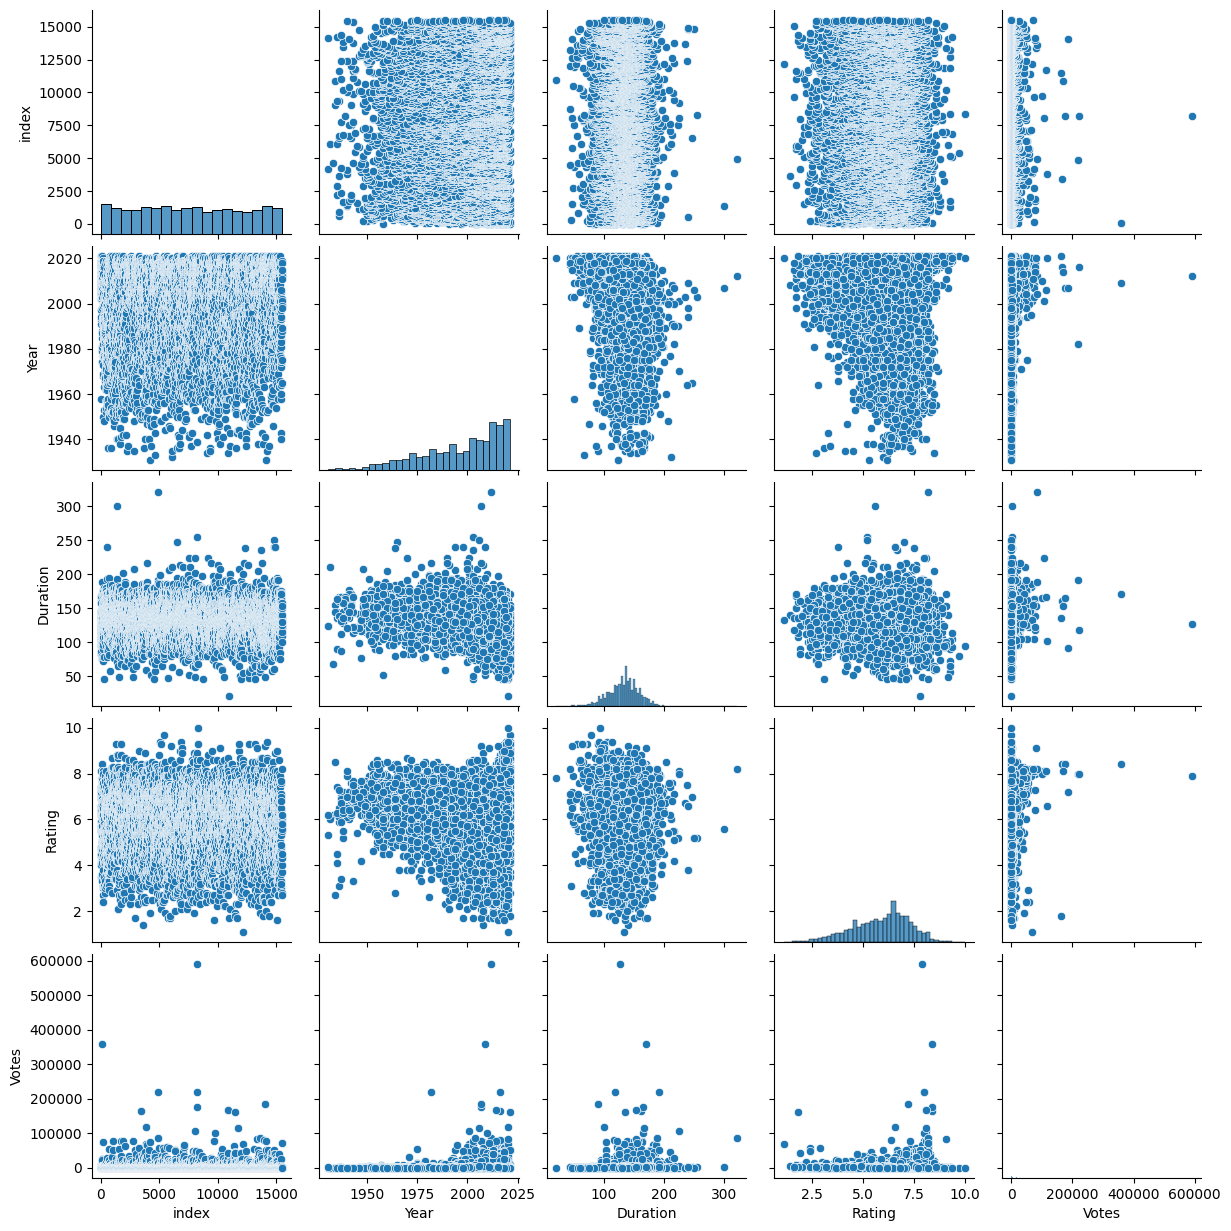

In [115]:
sns.pairplot(df)
plt.show()

<Axes: >

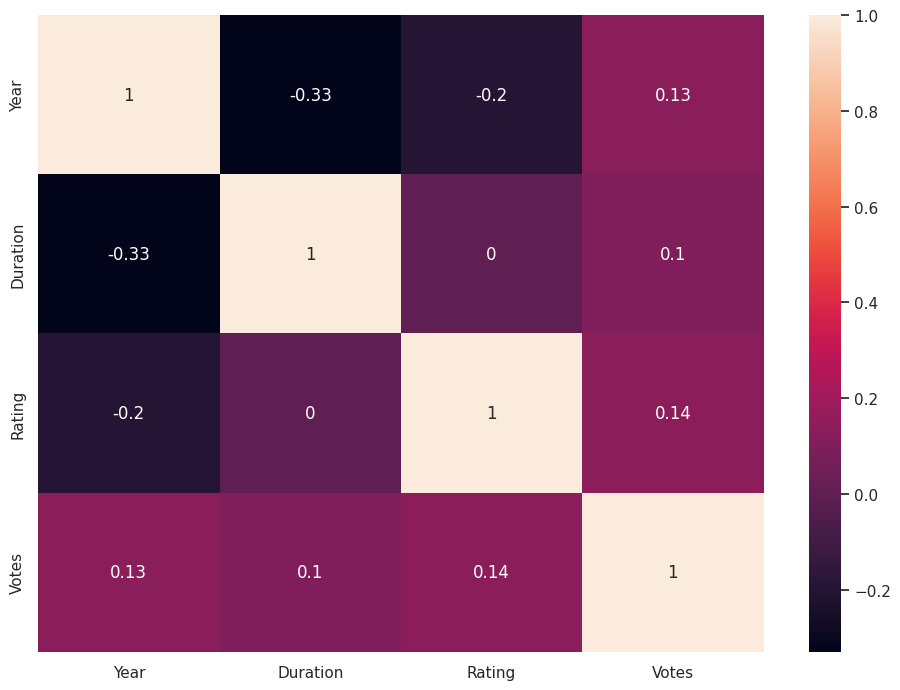

In [116]:
correlation_matrix = df[['Year','Duration','Rating','Votes']].corr().round(2)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)

In [117]:
label_encoder = preprocessing.LabelEncoder()
df['Actor 1']= label_encoder.fit_transform(df['Actor 1'])

In [118]:
df['Actor 1']

0       1352
1       1198
2        378
3        692
4       1934
        ... 
5654    1861
5655     763
5656     406
5657     112
5658     468
Name: Actor 1, Length: 5659, dtype: int64

In [119]:
df['Actor 2']= label_encoder.fit_transform(df['Actor 2'])

In [120]:
df['Actor 2']

0       2272
1        719
2         75
3       1112
4       1175
        ... 
5654    1801
5655    1619
5656     754
5657    2164
5658     753
Name: Actor 2, Length: 5659, dtype: int64

In [121]:
df['Actor 3']= label_encoder.fit_transform(df['Actor 3'])

In [122]:
df['Director']= label_encoder.fit_transform(df['Director'])

In [124]:
x=df[['Actor 1','Actor 2','Actor 3','Director']]
y=df['Rating']

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=1)

In [126]:
model = Sequential()
model.add(Dense(64))
model.add(Dropout(0.1))
model.add(Dense(128))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

In [127]:
optimizer=Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError(), metrics=['mse'])

In [128]:
model.fit(x_train,y_train,epochs=35)

Epoch 1/35
142/142 [==============================] - 4s 7ms/step - loss: 171000.2344 - mse: 171000.2344
Epoch 2/35
142/142 [==============================] - 1s 6ms/step - loss: 1534.7209 - mse: 1534.7209
Epoch 3/35
142/142 [==============================] - 1s 6ms/step - loss: 922.4517 - mse: 922.4517
Epoch 4/35
142/142 [==============================] - 0s 3ms/step - loss: 566.4476 - mse: 566.4476
Epoch 5/35
142/142 [==============================] - 0s 3ms/step - loss: 416.6345 - mse: 416.6345
Epoch 6/35
142/142 [==============================] - 0s 3ms/step - loss: 330.4117 - mse: 330.4117
Epoch 7/35
142/142 [==============================] - 0s 3ms/step - loss: 242.2087 - mse: 242.2087
Epoch 8/35
142/142 [==============================] - 0s 3ms/step - loss: 206.3794 - mse: 206.3794
Epoch 9/35
142/142 [==============================] - 0s 3ms/step - loss: 163.1694 - mse: 163.1694
Epoch 10/35
142/142 [==============================] - 0s 3ms/step - loss: 148.7829 - mse: 148.7829
E

In [129]:
model.evaluate(x_test,y_test)

36/36 [==============================] - 0s 4ms/step - loss: 5.7753 - mse: 5.7753


[5.775310516357422, 5.775310516357422]

In [130]:
y_pred = model.predict(x_test)
print("y predict is: ",y_pred)

36/36 [==============================] - 2s 18ms/step
y predict is:  [[5.260451 ]
 [5.09555  ]
 [7.2111945]
 ...
 [6.361694 ]
 [2.537848 ]
 [4.644952 ]]
